# Prueba de bondad de ajuste

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

## Distribucion continua (normal)

Un fabricante de luces quiere saber si el tiempo de vida de estas sigue una distribucion normal. Se saca una muestra de 40 focos y se anota su tiempo de vida en meses.

In [50]:
data = pd.read_csv('https://raw.githubusercontent.com/RajkumarGalaxy/dataset/master/Tabular/bulb_life.csv')
data.head(8)

,bulb,life
0,1,31
1,2,33
2,3,34
3,4,51
4,5,24
5,6,41
6,7,58
7,8,53


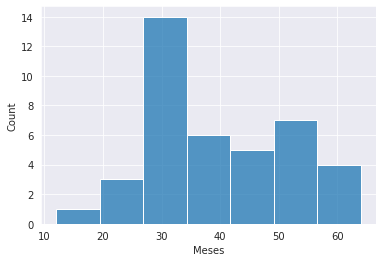

In [51]:
sns.set_style('darkgrid')
sns.histplot(data = data, x = 'life', bins = 'sturges')
plt.xlabel('Meses')
plt.show()

Sabemos que una variable aleatoria que sigue una distribución normal es continua. Por lo tanto, podemos definir clases de intervalos tales que cada una deba tener al menos cinco como frecuencia esperada.
Como aqui hay 40 focos de muestra, para tener cinco muestras esperadas en cada clase, deberíamos tener exactamente 40/5 = 8 clases en total.

In [52]:
media = data['life'].mean()
desv = data['life'].std()
clases = 8

intervalo = []
for i in range(1, clases + 1):
	#print(i, i / clases)
	val = st.norm.ppf(i / clases, media, desv)
	intervalo.append(val)
intervalo

1 0.125
2 0.25
3 0.375
4 0.5
5 0.625
6 0.75
7 0.875
8 1.0


[25.880755493307532,
 31.659347317884208,
 35.98060930826041,
 39.85,
 43.71939069173959,
 48.04065268211579,
 53.81924450669247,
 inf]

La distribucion va del infinito negativo hasta el infinito positivo. Incluyamos el infinito negativo en la lista.

In [53]:
intervalo.insert(0, -np.inf)
intervalo

[-inf,
 25.880755493307532,
 31.659347317884208,
 35.98060930826041,
 39.85,
 43.71939069173959,
 48.04065268211579,
 53.81924450669247,
 inf]

Construyamos la tabla de frecuencias

In [54]:
df = pd.DataFrame({'lim_inf': intervalo[:-1], 'lim_sup': intervalo[1:]})
df

,lim_inf,lim_sup
0,-inf,25.880755
1,25.880755,31.659347
2,31.659347,35.980609
3,35.980609,39.850000
4,39.850000,43.719391
5,43.719391,48.040653
6,48.040653,53.819245
7,53.819245,inf


In [55]:
df['oi'] = df.apply(lambda i: sum([i['lim_inf'] <= x < i['lim_sup'] for x in list(sorted(data['life']))]), axis = 1)
df['ei'] = 5
df

,lim_inf,lim_sup,oi,ei
0,-inf,25.880755,3,5
1,25.880755,31.659347,9,5
2,31.659347,35.980609,6,5
3,35.980609,39.850000,2,5
4,39.850000,43.719391,6,5
5,43.719391,48.040653,2,5
6,48.040653,53.819245,6,5
7,53.819245,inf,6,5


Sacar $X^{2}$ calculada

In [56]:
df['x2_calc'] = df.apply(lambda x: (x['oi'] - x['ei']) ** 2 / x['ei'], axis = 1)
df

,lim_inf,lim_sup,oi,ei,x2_calc
0,-inf,25.880755,3,5,0.8
1,25.880755,31.659347,9,5,3.2
2,31.659347,35.980609,6,5,0.2
3,35.980609,39.850000,2,5,1.8
4,39.850000,43.719391,6,5,0.2
5,43.719391,48.040653,2,5,1.8
6,48.040653,53.819245,6,5,0.2
7,53.819245,inf,6,5,0.2


In [57]:
x2_calc = df['x2_calc'].sum()
x2_calc

8.4

In [58]:
st.chisquare(df['oi'], df['ei'])

Power_divergenceResult(statistic=8.4, pvalue=0.29864634297052595)

Sacar $X^{2}$ critica

In [59]:
alfa = 0.05
k = len(df['oi'])  # renglones
p = 2  # parametros
gl = k - p - 1
x2_crit = st.chi2.isf(alfa, gl)
x2_crit

11.070497693516355

$H_{0}$ se rechaza si:
$X^{2}_{calc} \ge X^{2}_{\alpha, k - p - 1}$

In [60]:
if x2_calc >= x2_crit:
	print('H0 SI se rechaza')
else:
	print('H0 NO se rechaza')

H0 NO se rechaza


Sacar P-valor

In [61]:
st.chi2.sf(abs(x2_calc), gl)

0.13552522337752967

## Ejemplo 8-24

Se prueba el cargador de una laptop. Con $\alpha$ = 0.05, se quiere ver si el voltaje de salida esta descrito adecuadamente por una distribucion normal. A partir de una muestra aleatoria de *n = 100* unidades, se obtiene la media y la desviacion estandar. $\overline{x}$ = 5.04 voltios y S = 0.08 V.

In [62]:
media = 5.04
desv = 0.08

Una practica comun en la construccion de intervalos de clase, es escoger los limites de las clases de modo que las frecuencias esperadas $E_{i} = np_{i}$ sean iguales para todas las celdas. Para usar este metodo, se desea escoger los limites de las celdas $a_{0}, a_{1}, ..., a_{k}$ para las *k* clases, de modo que todas las probabilidades
<br>
$p_{i} = P(a_{i-1} \le X \le a_{i}) = \left(\int_{a_{i} - 1}^{a_{i}} f(x) \; dx\right)$
<br>
sean iguales.
Supongase que se deciden usar *k* = 8 clases. Para la distribucion normal estandar, los intervalos que dividen la escala en 8 segmentos igualmente probables son
[-$\infty$, -1.15), [-1.15, -0.675), [-0.675, -0.32), [-0.32, 0), [0, 0.32), [0.32, 0.675), [0.675, 1.15), [1.15, $\infty$).
Para cada intervalo $p_{i}$ = 1/8 = 0.125, de modo que las frecuencias esperadas de las celdas son $E_{i} = np_{i} = 100(0.125) = 12.5$. La tabla completa de frecuencias observadas y esperadas es la siguiente:

In [7]:
intervalo = [-np.inf, 4.948, 4.986, 5.014, 5.040, 5.066, 5.094, 5.132, np.inf]
df = pd.DataFrame({
    'lim_inf': intervalo[:-1],
    'lim_sup': intervalo[1:],
    'oi': [12,14,12,13,12,11,12,14],
    'ei': [12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5]
})
df

,lim_inf,lim_sup,oi,ei
0,-inf,4.948,12,12.5
1,4.948,4.986,14,12.5
2,4.986,5.014,12,12.5
3,5.014,5.040,13,12.5
4,5.040,5.066,12,12.5
5,5.066,5.094,11,12.5
6,5.094,5.132,12,12.5
7,5.132,inf,14,12.5


El limite del primer intevalo de clase es x - 1.15s = 4.948. El segundo intervalo de clase es [x - 1.15s, x - 0.675s) y asi sucesivamente.
Ahora puede aplicarse al problema el procedimiento de 8 pasos para la prueba de hipotesis.
1. La variable de interes es la forma de la distribucion del voltaje del cargador.
2. $H_{0}$: La distribucion es normal.
3. $H_{1}$: La distribucion no es normal.
4. $\alpha$ = 0.05
5. El estadistico de prueba es
    <br>
    $X^{2}_{calc} = \sum_{i = 1}^{k} \frac{(O_{i} - E_{i})^2}{E_{i}}$
6. Como se han estimado los dos parametros de la distribucion normal, el estadistico $X^2$ anterior tiene *k - p - 1* = 8 - 2 - 1 = 5 grados de libertad. Por lo tanto, $H_{0}$ se rechaza si $X^2_{calc} > X^2_{0.05, 5}$
7. Sacar calculos.
8. Concluir.

In [6]:
df['x2_calc'] = df.apply(lambda x: (x['oi'] - x['ei']) ** 2 / x['ei'], axis = 1)
df

,lim_inf,lim_sup,oi,ei,x2_calc
0,-inf,4.948,12,12.5,0.02
1,4.948,4.986,14,12.5,0.18
2,4.986,5.014,12,12.5,0.02
3,5.014,5.040,13,12.5,0.02
4,5.040,5.066,12,12.5,0.02
5,5.066,5.094,11,12.5,0.18
6,5.094,5.132,12,12.5,0.02
7,5.132,inf,14,12.5,0.18


In [65]:
x2_calc = df['x2_calc'].sum()
x2_calc

0.6399999999999999

In [66]:
alfa = 0.05
k = len(df['oi'])  # renglones
p = 2  # parametros
gl = k - p - 1
x2_crit = st.chi2.isf(alfa, gl)
x2_crit

11.070497693516355

In [67]:
if x2_calc >= x2_crit:
	print('H0 SI se rechaza')
else:
	print('H0 NO se rechaza')

H0 NO se rechaza


In [69]:
st.chi2.sf(abs(x2_calc), gl)

0.9860986649277519